In [140]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import utils # local file

plt.rcParams['font.size'] = 15.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
df_matches = pd.read_csv('./matches_with_network_params.csv', index_col=0)

In [142]:
df_matches[:3]

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID,Huskies_network_params,Opponent_network_params
0,1,Opponent1,win,1,0,home,Coach1,"{'clustering_coeff': 0.11072771290100378, 'sho...","{'clustering_coeff': 0.1934175485201471, 'shor..."
1,2,Opponent2,tie,1,1,away,Coach1,"{'clustering_coeff': 0.13766034155337248, 'sho...","{'clustering_coeff': 0.1961347345629039, 'shor..."
2,3,Opponent3,loss,0,2,away,Coach1,"{'clustering_coeff': 0.13896354205232736, 'sho...","{'clustering_coeff': 0.16620423330094877, 'sho..."


## Clustering coeff for winned matches

In [143]:
df_win = df_matches[df_matches['Outcome'] == 'win']

In [144]:
column = df_win['Huskies_network_params']
huskies_params = pd.DataFrame.from_dict({
    np.array(column.index)[ind]: eval(item)
    for ind, item in enumerate(column.values)
    }, orient='index')

column = df_win['Opponent_network_params']
oppo_params = pd.DataFrame.from_dict({
    np.array(column.index)[ind]: eval(item)
    for ind, item in enumerate(column.values)
    }, orient='index')

In [145]:
def calc_mean_std(x):
    return (np.mean(x), np.std(x, ddof=1) / np.sqrt(len(x)))

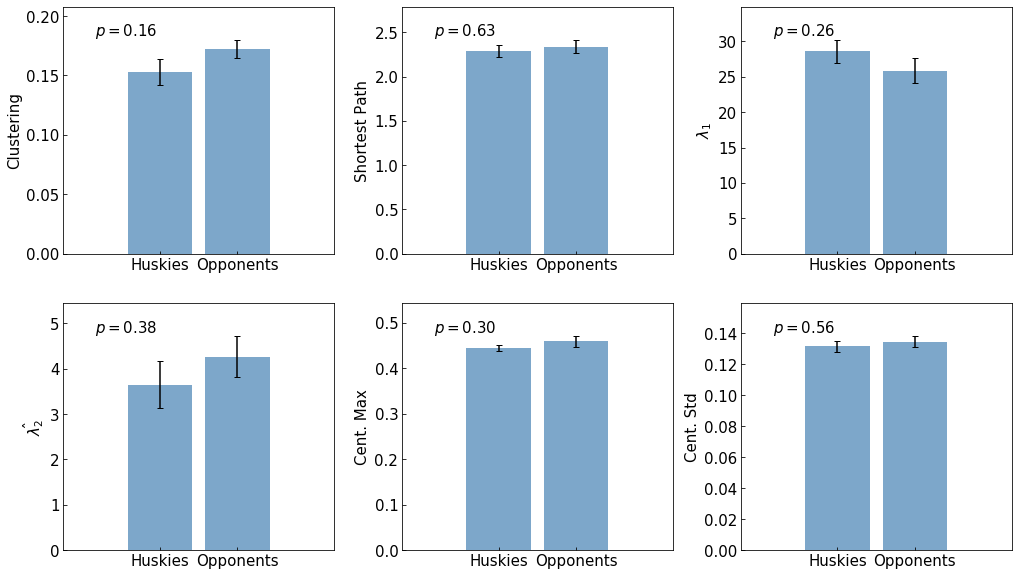

In [146]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

ylabel_set = ['Clustering', 'Shortest Path', 
              r'$\lambda_1$', r'$\hat{\lambda_2}$', 
              'Cent. Max', 'Cent. Std']

color_dict = {True: 'gold', False: 'steelblue'}

for ind, column in enumerate(huskies_params.columns):
    ax = axes[ind // 3, ind % 3]
    
    huskie = calc_mean_std(huskies_params[column]) 
    oppo = calc_mean_std(oppo_params[column])
    
    levene = stats.levene(huskies_params[column].values, oppo_params[column].values)
    ttest = stats.ttest_ind(huskies_params[column].values, 
                            oppo_params[column].values, 
                            equal_var=(levene.pvalue > 0.05))
    pvalue = ttest.pvalue

    x_label = ['Huskies', 'Opponents']
    x_pos = [1.5, 2.7]
    
    ax.bar(x_pos, [huskie[0], oppo[0]], 
           yerr=[huskie[1], oppo[1]], 
           error_kw={'capsize': 3}, 
           width=1, color=color_dict[pvalue < 0.05], 
           alpha=0.7)
    ylim = ax.get_ylim()
    ax.text(0.5, ylim[1] - (ylim[1] - ylim[0]) * 0.03, r'$p={:.2f}$'.format(pvalue))
    ax.set_xlim(0, 4.2)
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_label)
    ax.set_ylabel(ylabel_set[ind])
    ax.tick_params(direction='in')
    
plt.subplots_adjust(wspace=0.25)